In [2]:
# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans


In [3]:
# 2.Load the data set
x1=np.array([1,2,3,4,5,6,7,8,9,0,12,45,67,89])
x2=np.array([2,3,4,5,66,77,67,12,45,76,9,8,7,6])
data = pd.DataFrame({'x':x1,'y':x2})
data

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,66
5,6,77
6,7,67
7,8,12
8,9,45
9,0,76


In [4]:
# 3.top values
data.head()

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,66


In [5]:
# 4.select x1 only
data['x']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9      0
10    12
11    45
12    67
13    89
Name: x, dtype: int64

In [6]:
# 5.import KMean clustering
from sklearn.cluster import KMeans

In [7]:
# 6.List to store within cluster sum of square(wcss)
kmeans = KMeans(n_clusters = 1, max_iter = 100,n_init='auto').fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

Clusters assigned to each datapoints :
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 22414.642857142855


In [8]:
# 7.Fit the kMeans algorithm with different values of k
# for k=9
kmeans = KMeans(n_clusters = 9, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)
# for k=3
kmeans = KMeans(n_clusters = 3, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

Clusters assigned to each datapoints :
0     2
1     2
2     2
3     2
4     0
5     6
6     0
7     7
8     5
9     8
10    7
11    1
12    4
13    3
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 25.0
Clusters assigned to each datapoints :
0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    2
12    2
13    2
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 1931.6333333333334


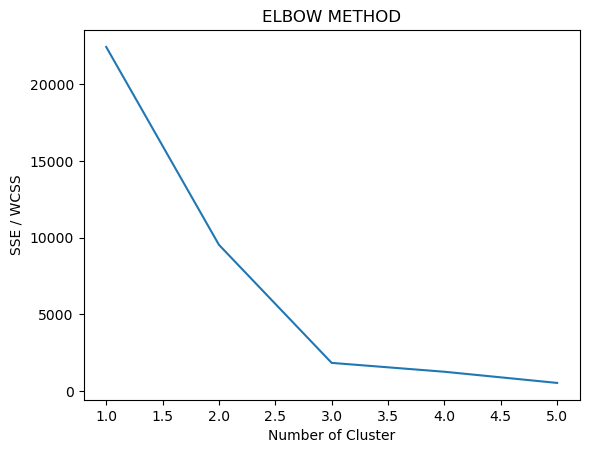

In [9]:
# 8.plot the wcss values
# ELBOW METHOD
# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters

k_values=[]
wcss =[]

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100,n_init='auto',random_state=42).fit(data)
  k_values.append(k)
  wcss.append(kmeans.inertia_)
 

plt.figure()
plt.plot(k_values,wcss)
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()


In [28]:
# 9.fit KMeans algo with k=5
kmeans = KMeans(n_clusters = 3, max_iter = 100,n_init='auto',random_state=42).fit(data)
data['clusters'] = kmeans.labels_
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)


Sum of Square Error/ WCSS is : 1850.7000000000003


In [29]:
data

,x,y,clusters
0,1,2,1
1,2,3,1
2,3,4,1
3,4,5,1
4,5,66,0
5,6,77,0
6,7,67,0
7,8,12,1
8,9,45,0
9,0,76,0


In [33]:
# 10.Make predictions

new_points = pd.DataFrame({'x': [10, 50,30,60,20], 'y': [10, 50,66,55,45],'clusters':[1,1,0,2,2]})
predictions = kmeans.predict(new_points)
print("Predicted cluster labels for new points:", predictions)



Predicted cluster labels for new points: [1 2 0 2 0]


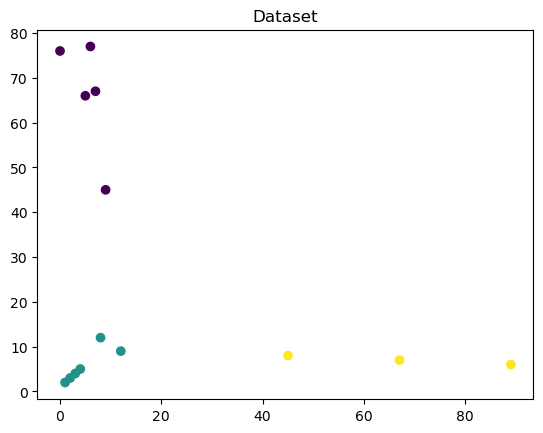

In [34]:
# 11.visualizing the clusters
# plt.plot()
plt.title('Dataset')
plt.scatter(x1,x2,c=kmeans.labels_)
plt.show()

In [21]:
df = pd.read_csv('/home/user/Downloads/Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica



Sum of Square Error/ WCSS is : 680.8244

Sum of Square Error/ WCSS is : 152.36870647733903

Sum of Square Error/ WCSS is : 78.9450658259773

Sum of Square Error/ WCSS is : 57.35501904761905


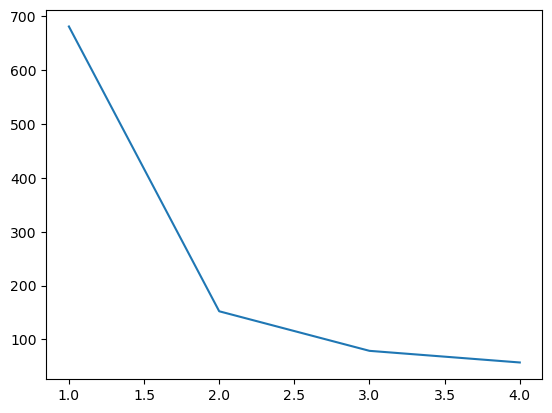

For cluster = 4, SSE/WCSS is 57.35501904761905


In [22]:
x=df.iloc[:,1:5]
k_values =[]
wcss_values=[]
for k in range(1,5):
    kmeans = KMeans(n_clusters = k, max_iter = 100,n_init='auto',random_state=42).fit(x)
    print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)
    k_values.append(k)
    wcss_values.append(kmeans.inertia_)

plt.plot(k_values,wcss_values)
plt.show()

kmeans = KMeans(n_clusters=k,max_iter=100,n_init='auto',random_state=42).fit(x)
x['clusters'] = kmeans.labels_
sse[k] = kmeans.inertia_
print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))
